## A test on a CoLoMoTo Docker image

### Requires installation

- `colomoto-docker`, `ginsim`, and `ginsim-python` from the Anaconda repository (channel: colomoto)
- `jinja2` and `pydot` (channel: conda-forge)
- `graphviz` (os package manager)

In [1]:
from optboolnet.launch import control_fixpoint
import biolqm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Setup
lqm = biolqm.load("http://ginsim.org/sites/default/files/Bladder_Model.zginml")
bn = biolqm.to_minibn(lqm, ensure_boolean=True)

inputs = {
    "GrowthInhibitors":1,
    "EGFR_stimulus":1,
    "FGFR3_stimulus":1
}
target = {"Apoptosis_b1": 1, "RB1": 1}

/home/kalebmoon07/github/optboolnet/example/Bladder_Model.zginml

Restricted license - for non-production use only - expires 2026-11-23


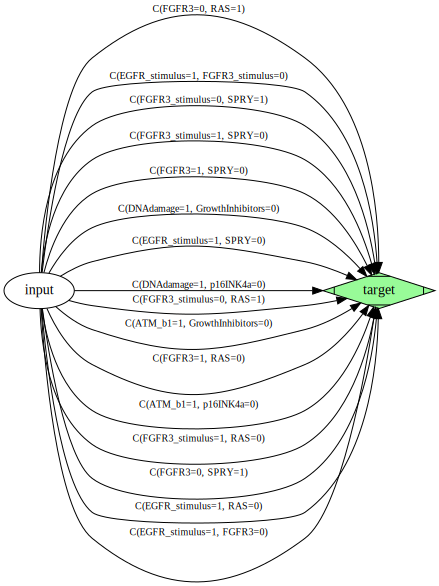

,ATM_b1,DNAdamage,EGFR_stimulus,FGFR3,FGFR3_stimulus,GrowthInhibitors,RAS,SPRY,p16INK4a
0,,,,,0,,,1,
1,,,,,0,,1,,
2,,,,,1,,,0,
3,,,,,1,,0,,
4,,,,0,,,,1,
5,,,,0,,,1,,
6,,,,1,,,,0,
7,,,,1,,,0,,
8,,,1,,,,,0,
9,,,1,,,,0,,


In [3]:
# By default, if no attractors are found after a control, we accept it as a valid control.
s = control_fixpoint(bn, max_size=2, target=target, inputs=inputs, exclude=["Apoptosis_b1","RB1"], allow_empty_attractor=True)
display(s.as_graph())
display(s.as_table())

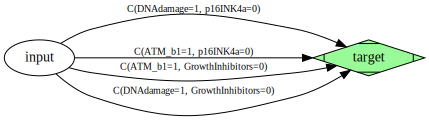

,ATM_b1,DNAdamage,GrowthInhibitors,p16INK4a
0,,1,,0
1,,1,0,
2,1,,,0
3,1,,0,


In [4]:
# If you want to only accept controls that lead to at least one attractor, set allow_empty_attractor to False
s = control_fixpoint(bn, max_size=2, target=target, inputs=inputs, exclude=["Apoptosis_b1","RB1"], allow_empty_attractor=False)
display(s.as_graph())
display(s.as_table())